In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../Churn_Modelling.csv')


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'] , axis= 1 ,inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
cat_feature = [feat for feat in df.columns if df[feat].dtype == "O"]
num_feature = [feat for feat in df.columns if df[feat].dtype != "O"]


In [15]:
def get_info_about_cat_feature(features):
    for feat in features:
        print(f"the {feat} have {df[feat].nunique()} values " )
        print(f"and this is unique {df[feat].unique() }")
        print(f'and this is value count {df[feat].value_counts()}')
        print("-------------------------------------------------")

In [36]:
def get_info_about_num_feature_with_plot(features, threshold=0.05):
    for feat in features:
        if df[feat].nunique() <= 10:  # غالبًا categorical
            print(f"{feat} looks categorical, skipping outlier detection.")
            continue

        # حساب الـ IQR
        lower = df[feat].quantile(0.25)
        upper = df[feat].quantile(0.75)
        iqr = upper - lower
        lower_bound = lower - 1.5 * iqr
        upper_bound = upper + 1.5 * iqr

        # تحديد الـ outliers
        outliers = df[(df[feat] < lower_bound) | (df[feat] > upper_bound)]
        outlier_count = len(outliers)
        total_count = len(df)
        ratio = outlier_count / total_count

        print(f"{feat} has {outlier_count} Outliers ({ratio:.2%} of data).")

        # رسم البلوت لو النسبة أكبر من threshold
        if ratio > threshold:
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=df[feat],color ='blue')
            plt.title(f"Boxplot of {feat} with Outliers")
            plt.show()



In [38]:
# مثال تشغيل
get_info_about_num_feature_with_plot(num_feature, threshold=0.05)

CreditScore has 15 Outliers (0.15% of data).
Age has 359 Outliers (3.59% of data).
Tenure has 0 Outliers (0.00% of data).
Balance has 0 Outliers (0.00% of data).
NumOfProducts looks categorical, skipping outlier detection.
HasCrCard looks categorical, skipping outlier detection.
IsActiveMember looks categorical, skipping outlier detection.
EstimatedSalary has 0 Outliers (0.00% of data).
Exited looks categorical, skipping outlier detection.


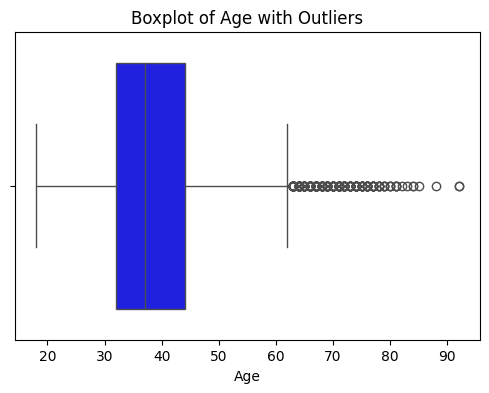

In [42]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'],color ='blue')
plt.title("Boxplot of Age with Outliers")
plt.show()

In [43]:
get_info_about_cat_feature(cat_feature)

the Geography have 3 values 
and this is unique ['France' 'Spain' 'Germany']
and this is value count Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
-------------------------------------------------
the Gender have 2 values 
and this is unique ['Female' 'Male']
and this is value count Gender
Male      5457
Female    4543
Name: count, dtype: int64
-------------------------------------------------


In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Exited'] = df['Exited'].map({1 : "Yes" , 0 : "No"})

In [59]:
col = ['NumOfProducts'	,'HasCrCard'	,'IsActiveMember' , 'Geography']

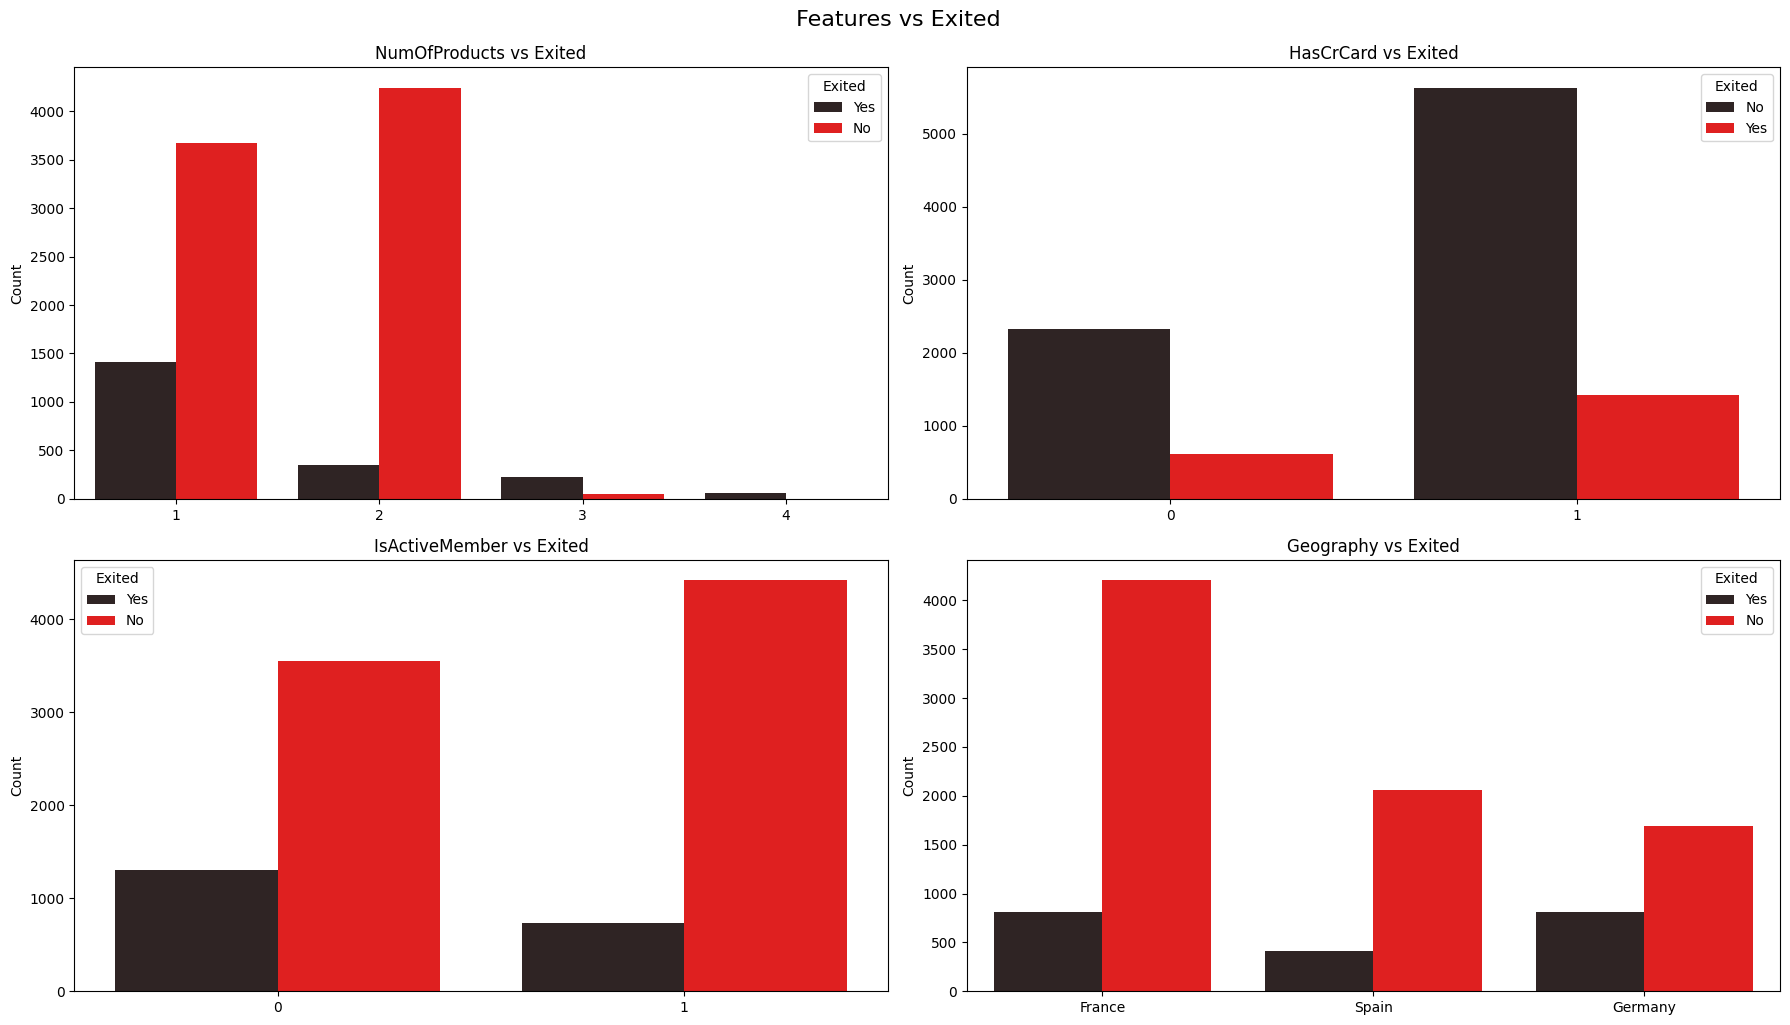

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()  

for i, col in enumerate(col):
    sns.countplot(data=df, x=col, hue='Exited', ax=axes[i],color='red')
    axes[i].set_title(f'{col} vs Exited')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.suptitle(" Features vs Exited", fontsize=16, y=1.02)
plt.show()


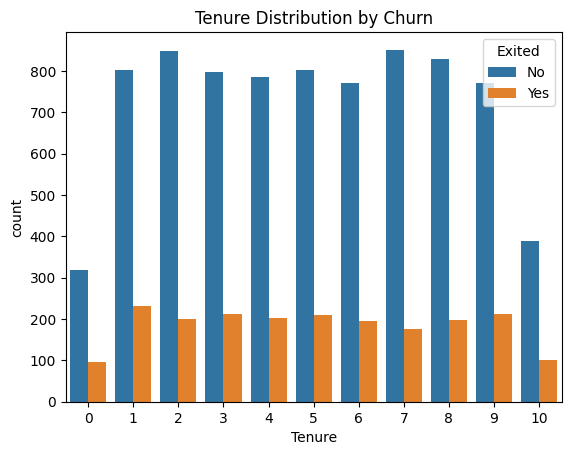

In [66]:
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.title('Tenure Distribution by Churn')
plt.show()


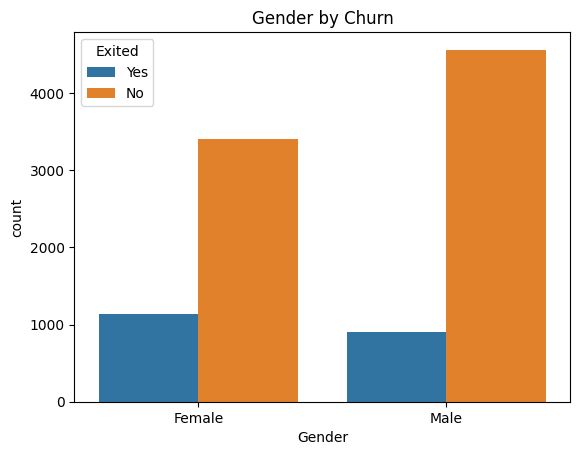

In [68]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender by Churn')
plt.show()

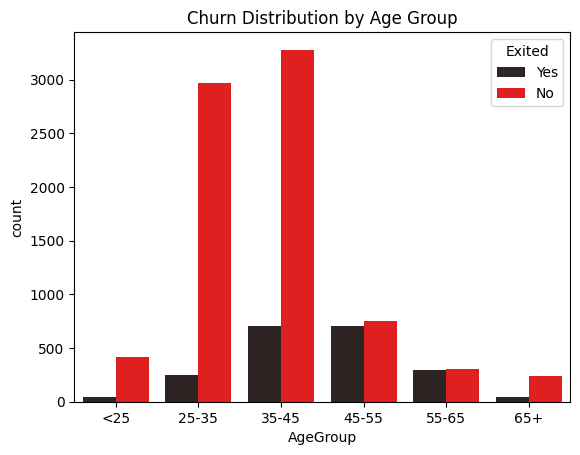

In [72]:

bins = [0, 25, 35, 45, 55, 65, 100]  
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+'] 
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sns.countplot(data=df, x='AgeGroup', hue='Exited',color = 'red')
plt.title('Churn Distribution by Age Group')
plt.show()


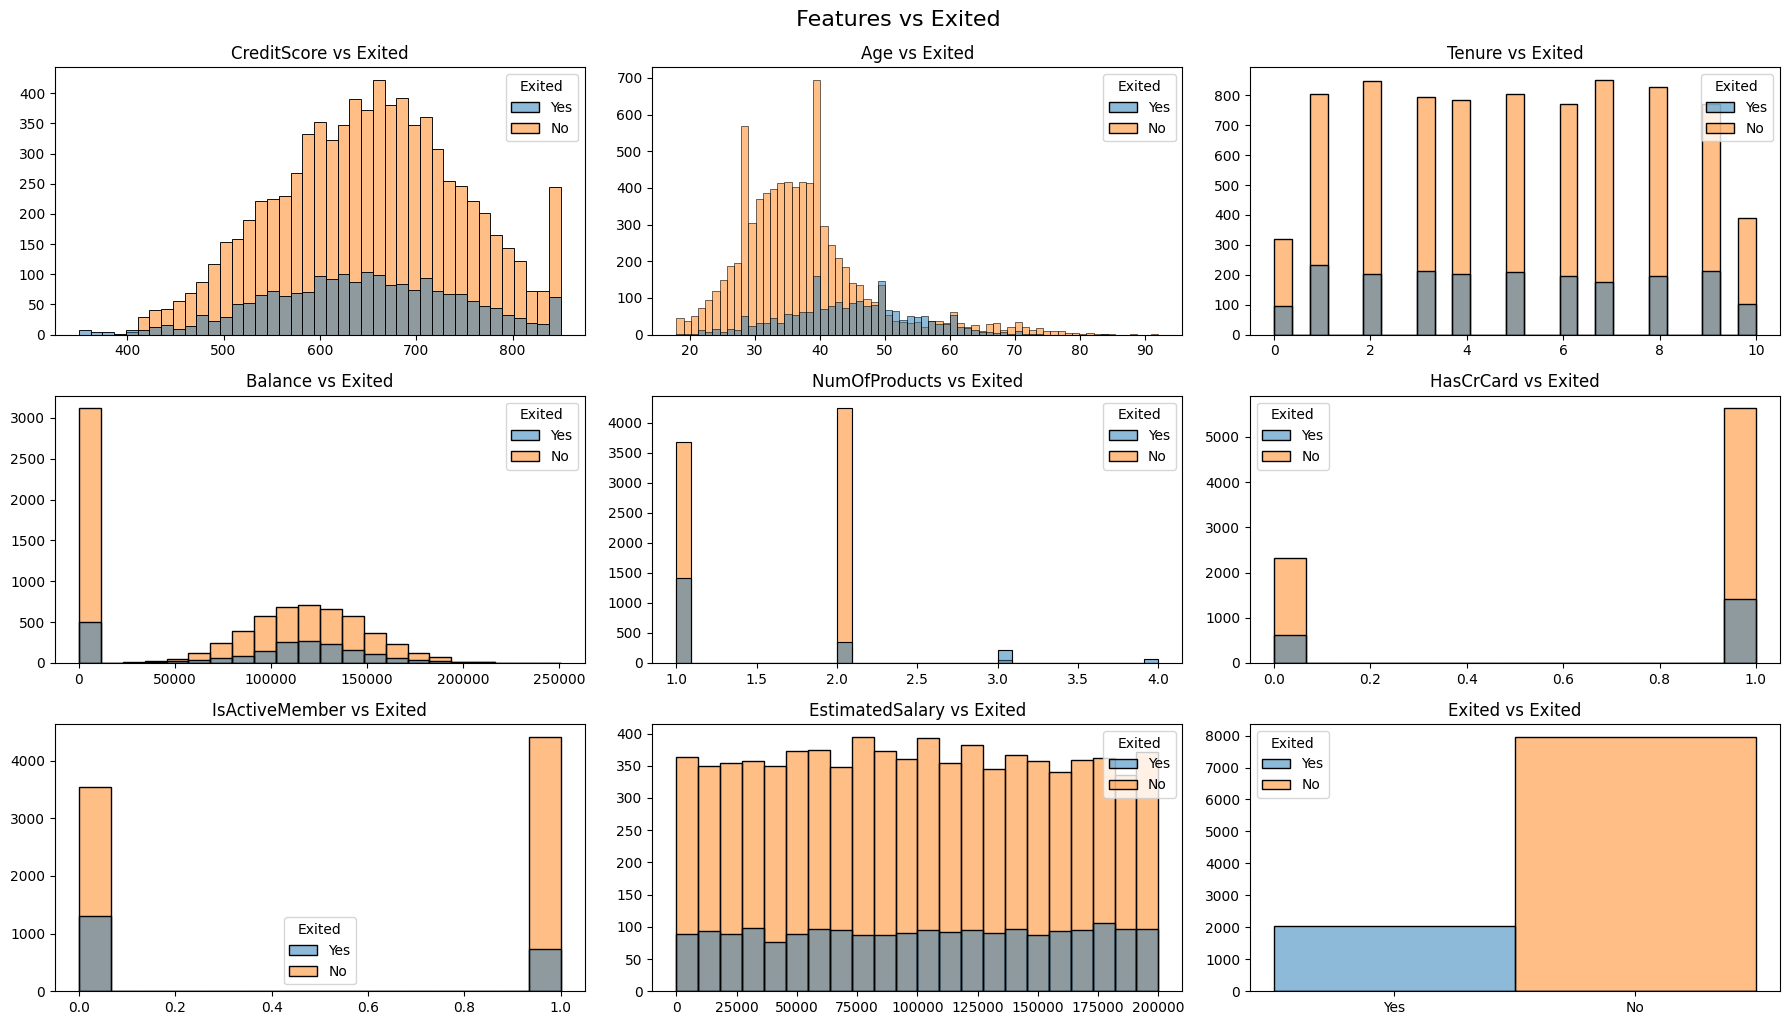

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flatten()  

for i, col in enumerate(num_feature):
    sns.histplot(data=df, x=col, hue='Exited', ax=axes[i],color='red')
    axes[i].set_title(f'{col} vs Exited')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle(" Features vs Exited", fontsize=16, y=1.02)
plt.show()


In [83]:
df['Exited'] = df['Exited'].map({ "Yes": 1 , "No": 0})

<Axes: >

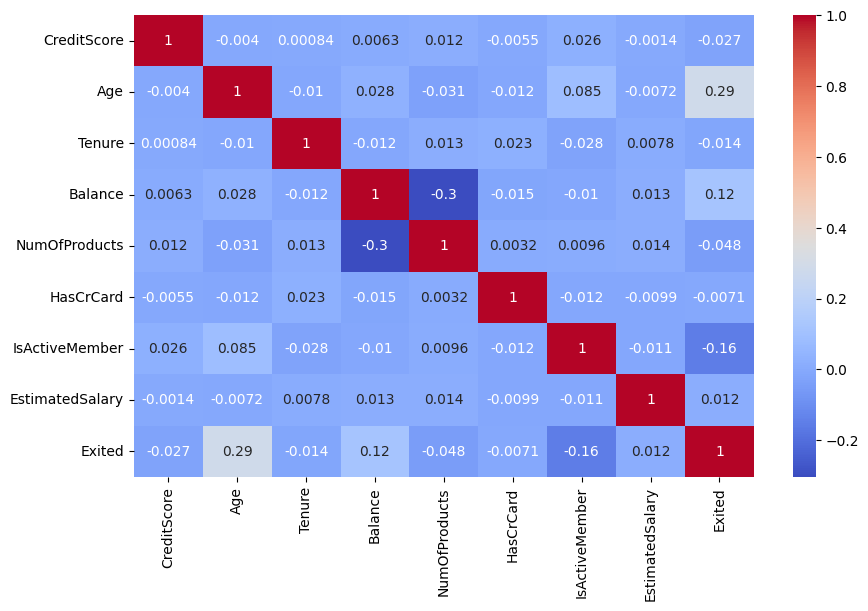

In [86]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df[num_feature].corr(), annot=True, cmap='coolwarm')

In [87]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-45
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-45
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-45


In [89]:
df.drop(columns = ['AgeGroup'] ,axis = 1 ,inplace =True)

In [90]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
